## Created on Mon June 24 2024

## @author: Jeong-Woon, Park

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load X_train gene expression dataset.
feature = pd.read_csv("TCGA-BRCA.htseq_953_tpm.csv", sep = ",", index_col = "Unnamed: 0").T
feature.head()

,MUC1,EFNA4,PRCC,TFB2M,S100A16,C2CD4D,APH1A,SH3BP5L,MIR205HG,IGSF9,...,SAMD9,SMARCD3,TFPI2,SMO,CNTNAP2,PIP,SAMD9L,AOAH,STEAP4,AMPH
TCGA-3C-AAAU-01A,8.900661,3.028014,6.942690,5.458877,8.427060,2.560218,9.866382,5.023810,0.074225,4.840422,...,3.789197,4.322610,0.328535,2.469413,4.218834,11.411037,2.371204,1.852208,4.070509,3.577865
TCGA-3C-AALI-01A,6.835549,3.569155,6.483371,4.983792,9.688150,2.444607,7.581364,4.935183,1.631066,4.849579,...,3.665642,4.179263,1.838958,4.570966,5.050634,6.616067,4.091995,3.342287,0.977468,0.958917
TCGA-3C-AALK-01A,10.127770,6.368442,6.493538,5.020360,9.657717,2.036577,7.967486,5.110414,4.234884,6.312323,...,3.089954,3.923715,3.775756,4.486202,2.511513,9.670613,3.643280,2.738014,3.740960,1.988040
TCGA-5L-AAT0-01A,8.753552,6.470379,6.893691,5.211516,8.529591,1.966672,8.527836,5.595410,5.255674,6.400663,...,3.283787,3.913977,1.232945,4.679827,0.631159,6.341259,3.819478,3.703250,3.503779,2.246283
TCGA-5L-AAT1-01A,8.822118,6.374059,6.608675,5.657453,10.064593,2.048092,8.173741,5.171648,4.279417,5.074423,...,4.213115,4.517532,4.315768,4.588798,6.601535,10.228201,4.443334,4.935356,2.432338,2.534668


In [3]:
# Load PAM50 subtype dataset.
target = pd.read_csv("TCGA-BRCA.953_metadata.csv", sep = ",", index_col = "patient")
target.head()

,BRCA_Subtype_PAM50
patient,
TCGA-3C-AAAU-01A,LumA
TCGA-3C-AALI-01A,Her2
TCGA-3C-AALK-01A,LumA
TCGA-5L-AAT0-01A,LumA
TCGA-5L-AAT1-01A,LumA


In [4]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, 
                                                    stratify = target, random_state = 42)

print("Feature shape for train :", X_train.shape)
print("Target shape for train :", y_train.shape)
print("Feature shape for test :", X_test.shape)
print("Target shape for test :", y_test.shape)

Feature shape for train : (667, 813)
Target shape for train : (667, 1)
Feature shape for test : (286, 813)
Target shape for test : (286, 1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'MUC1'),
  Text(1, 0, 'EFNA4'),
  Text(2, 0, 'PRCC'),
  Text(3, 0, 'TFB2M'),
  Text(4, 0, 'S100A16'),
  Text(5, 0, 'C2CD4D'),
  Text(6, 0, 'APH1A'),
  Text(7, 0, 'SH3BP5L'),
  Text(8, 0, 'MIR205HG'),
  Text(9, 0, 'IGSF9')])

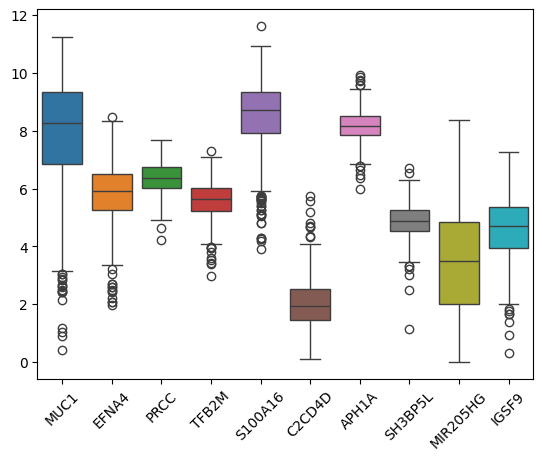

In [5]:
# Feature distritubion
plt.rcdefaults()
sns.boxplot(X_train.iloc[:, 0:10])
plt.xticks(rotation = 45)

In [6]:
# Z-score normalization on TPM-level data
# https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-021-02936-w
train_median = np.median(X_train, axis = 0)
train_std = np.std(X_train, axis = 0)

X_train_scale = (X_train - train_median) / train_std
X_test_scale = (X_test - train_median) / train_std

X_train = pd.DataFrame(X_train_scale, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, index = X_test.index, columns = X_test.columns)

In [7]:
# Select top 10 genes
select_gene = ['CDH3', 'ERBB2', 'TYMS', 'GREB1', 'OSR1', 'MYBL2', 'FAM83D', 'ESR1', 'FOXC1', 'NAT1']
X_train = X_train.loc[:, select_gene]
X_test = X_test.loc[:, select_gene]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CDH3'),
  Text(1, 0, 'ERBB2'),
  Text(2, 0, 'TYMS'),
  Text(3, 0, 'GREB1'),
  Text(4, 0, 'OSR1'),
  Text(5, 0, 'MYBL2'),
  Text(6, 0, 'FAM83D'),
  Text(7, 0, 'ESR1'),
  Text(8, 0, 'FOXC1'),
  Text(9, 0, 'NAT1')])

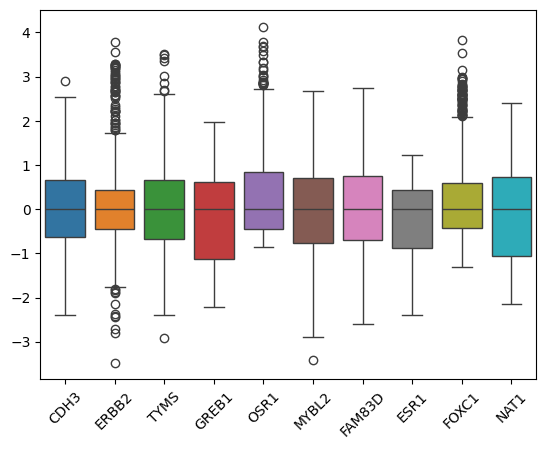

In [8]:
# Feature distritubion after normalization (Train)
plt.rcdefaults()
sns.boxplot(X_train)
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CDH3'),
  Text(1, 0, 'ERBB2'),
  Text(2, 0, 'TYMS'),
  Text(3, 0, 'GREB1'),
  Text(4, 0, 'OSR1'),
  Text(5, 0, 'MYBL2'),
  Text(6, 0, 'FAM83D'),
  Text(7, 0, 'ESR1'),
  Text(8, 0, 'FOXC1'),
  Text(9, 0, 'NAT1')])

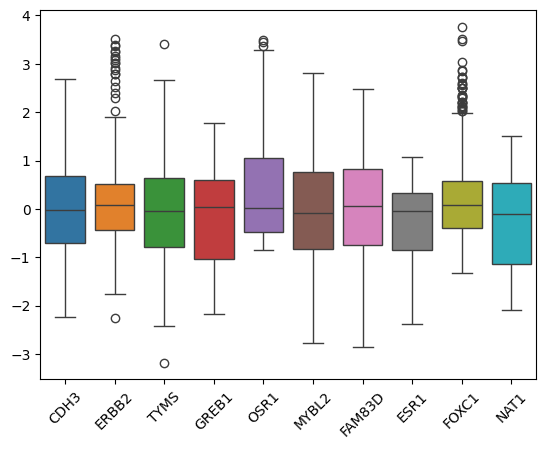

In [9]:
# Feature distritubion after normalization (Test)
plt.rcdefaults()
sns.boxplot(X_test)
plt.xticks(rotation = 45)

In [10]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoder = encoder.transform(y_train)
y_test_encoder = encoder.transform(y_test)

# Create series.
y_train = pd.Series(y_train_encoder, index = y_train.index)
y_test = pd.Series(y_test_encoder, index = y_test.index)

In [11]:
# check whether sample id between feature and target dataset match or not.
print("The number of matched sample id in training :", sum(X_train.index == y_train.index))
print("The number of matched sample id in test :", sum(X_test.index == y_test.index))

The number of matched sample id in training : 667
The number of matched sample id in test : 286


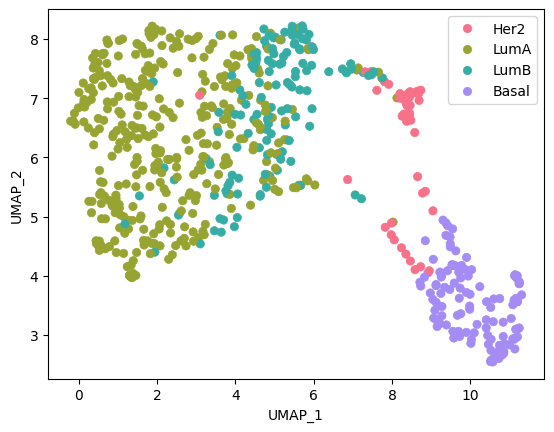

In [12]:
# Initialize UMAP
from umap import UMAP
plt.rcdefaults()

umap_2d = UMAP(n_components = 2, init = "random", random_state = 42)
proj_2d = umap_2d.fit_transform(X_train)
proj_2d = pd.DataFrame(proj_2d, columns = ["UMAP_1", "UMAP_2"])
proj_2d['PAM50'] = y_train.map({0: "Basal", 1: "Her2", 2: "LumA", 3: "LumB"}).values

# Plot using seaborn
sns.scatterplot(data = proj_2d, x = 'UMAP_1', y = 'UMAP_2', hue = 'PAM50', edgecolor = None, palette = "husl")
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(loc = 'best')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, make_scorer, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_validate
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from imblearn.metrics import specificity_score, sensitivity_score

# Model fitting and prediction.
model = LogisticRegression(random_state = 42, penalty = "elasticnet", solver = "saga", 
                           max_iter = 10000, C = 1, l1_ratio = 0.7, class_weight = None)
model.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=0.7, max_iter=10000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [14]:
# Model prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [15]:
# Classification report
print(classification_report(y_test, y_pred, target_names = ["Basal", "Her2", "LumA", "LumB"]))

              precision    recall  f1-score   support

       Basal       1.00      0.98      0.99        52
        Her2       0.84      0.76      0.80        21
        LumA       0.91      0.94      0.92       157
        LumB       0.76      0.75      0.76        56

    accuracy                           0.90       286
   macro avg       0.88      0.86      0.87       286
weighted avg       0.89      0.90      0.89       286



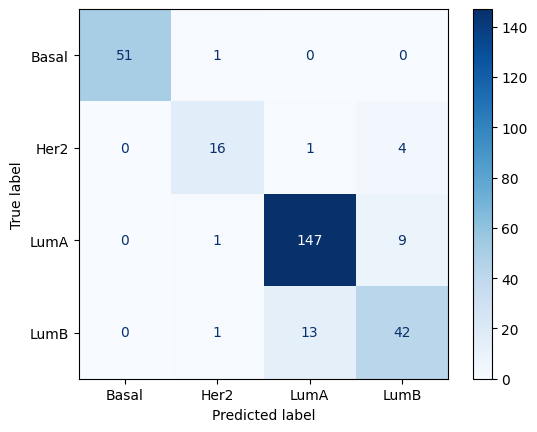

In [16]:
# Confusion matrix
plt.rcdefaults()
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                                display_labels = ["Basal", "Her2", "LumA", "LumB"],
                                                cmap = plt.cm.Blues)
plt.grid(False)
plt.show()

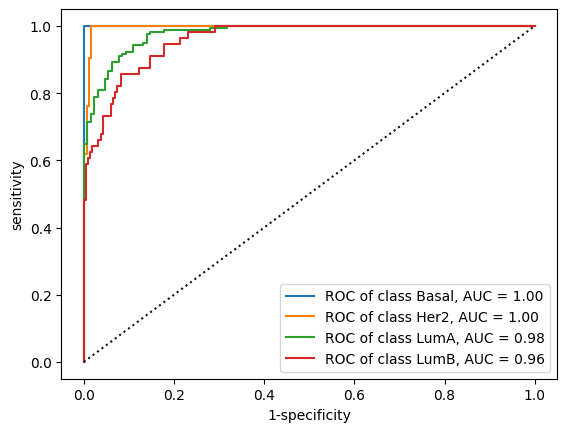

In [17]:
# ROC curve
plt.rcdefaults()
visualizer = ROCAUC(model, classes = ["Basal", "Her2", "LumA", "LumB"], macro = False, micro = False, title = " ")

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)
visualizer.ax.set_xlabel("1-specificity")
visualizer.ax.set_ylabel("sensitivity")
visualizer.ax.legend(loc='best')
plt.show()

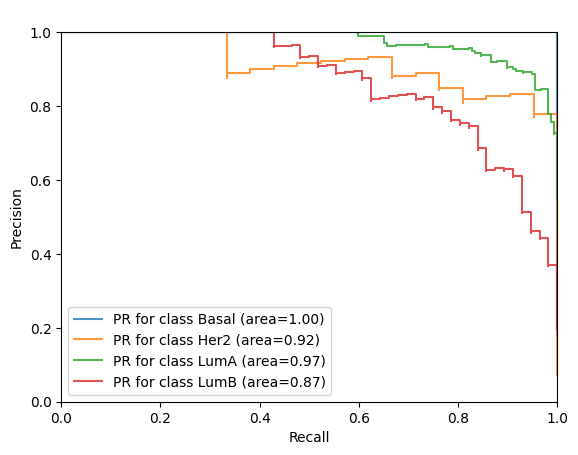

<Axes: title={'center': ' '}, xlabel='Recall', ylabel='Precision'>

In [18]:
# Precision-Recall curve
plt.rcdefaults()
visualizer = PrecisionRecallCurve(model, per_class = True, classes = ["Basal", "Her2", "LumA", "LumB"], 
                                  title = " ", ap_score = False)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()

In [19]:
# Accuracy
round(accuracy_score(y_test, y_pred), 3)

0.895

In [20]:
# Macro average specificity
round(specificity_score(y_test, y_pred, average = "macro"), 3)

0.956

In [21]:
# Macro average sensitivity
round(sensitivity_score(y_test, y_pred, average = "macro"), 3)

0.857

In [22]:
# Macro average F1 score
round(f1_score(y_test, y_pred, average = "macro"), 3)

0.868

In [23]:
# Macro average AUROC
round(roc_auc_score(y_test, y_pred_proba, multi_class = "ovr", average = "macro"), 3)

0.983